Item_Identifier     	Unique product ID
Item_Weight         	Weight of product
Item_Fat_Content    	Whether the product is low fat or not
Item_Visibility     	The % of total display area of all products in a store allocated to the particular product
Item_Type           	The category to which the product belongs
Item_MRP            	Maximum Retail Price (list price) of the product
Outlet_Identifier   	Unique store ID
Outlet_Establishment_Year   	The year in which store was established
Outlet_Size                 	The size of the store in terms of ground area covered
Outlet_Location_Type        	The type of city in which the store is located
Outlet_Type                 	Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales           	Sales of the product in the particular store. This is the outcome variable to be predicted.
 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. LOADING THE DATASETS

In [5]:
train=pd.read_csv('train_v9rqX0R.csv')
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [6]:
test=pd.read_csv('test_AbJTz2l.csv')
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
train.shape,test.shape

((8523, 12), (5681, 11))

## 2.DATA EXPLOARTION

In [182]:
#combining both train and test datset.


train["source"]="train"
test["source"]="test"

data=pd.concat([train,test],axis=0)
data.shape

(14204, 13)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


numerical features=
                   Item_MRP,
                   Item_Visibility,
                   Item_Weight,
                   Outlet_Establishment_Year
                   

            
categorical features=
                     Item_Fat_Content,
                     Item_Type,
                     Outlet_Location_Type,         
                     Outlet_Size,               
                     Outlet_Type,
                     Outlet_Identifier,
                     Item_Identifier

                     
                        
target column=Item_Outlet_Sales

In [7]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


inference made:

    1.The very first outlet was established in year 1985 & the latest was in 2009

    2.The item has minimum weight of 4lbs with the maximum going up to 21lbs

    3.Visibility of any product cannot '0' which means the product is not present in the store but still got sold.so need         to something with this 

    4..The average sales of all the outlet is 2181 and the overall sales ranges from - 33 to 13086 dollars
    

In [168]:
#filtring categorical columns seperately
cat=data.select_dtypes(include='object')


#dropping Outlet_Identifier,Item_Identifier from the dataset
#cat_col=cat.drop(['Outlet_Identifier','Item_Identifier'],axis=1)


#checking the number of unique values in each columns
for col in cat:
    print('frequency of categories in',col,":")
    print(data[col].value_counts(),"\n\n")

frequency of categories in Item_Fat_Content :
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 


frequency of categories in Item_Identifier :
NCU29    10
FDM09    10
FDO08    10
FDO01    10
FDL14    10
         ..
FDM10     7
FDI46     7
FDL50     7
FDX49     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64 


frequency of categories in Item_Type :
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64 


frequency of categories in Outlet_Identifier :
OUT02

#### inference made:

        1.In "Item_Fat_Content" column, ( Low Fat : LF : low fat ) , (Regular:reg) needs to be changed.
        
        2.In "Outlet_Type" column, Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea             before doing it.
        
        3.In Outlet_Identifier and Item_Identifier, certain grouping can be seen.
          i.e in Item_Identifier,the first to letters FD, DR, NC, can be assume to be as Food, Drinks & Non-Consumable can           be grouped accordingly.

### 3.DATA VISUALIZATION

### a.target column

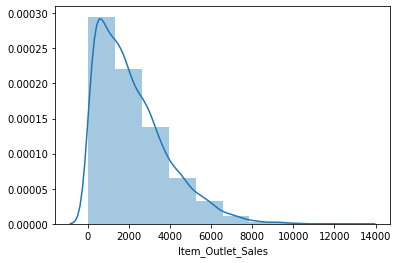

In [11]:
sns.distplot(train['Item_Outlet_Sales'],bins=10)
plt.show()

observetions:

Deviation from the normal distribution.
There is positive skewness.
Shows peakedness.

### b.univariate analysis

### b1.continuous features

In [40]:
def plot(feature):
    plt.hist(feature,bins=100)
    plt.show()
    return

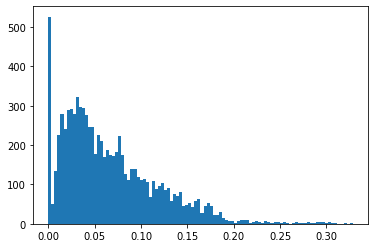

In [62]:
plot(train['Item_Visibility'])

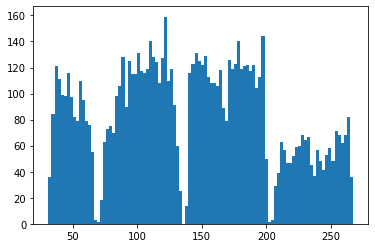

In [63]:
plot(train['Item_MRP'])

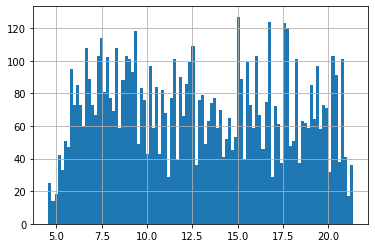

In [68]:
train['Item_Weight'].hist(bins = 100);
plt.show()

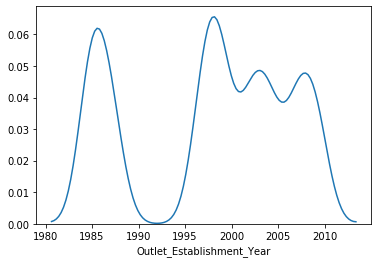

In [65]:
sns.distplot(train['Outlet_Establishment_Year'],hist=False)

inference made:

    1.'Item_Visibility' is right skewed.
    
    2.'Item_MRP' follows some range.
    
    3.'Item_Weight' does not follow any pattern.
    
    4.In 'Outlet_Establishment_Year',most frequent years 1985 and 1998.
    

### b2.categorical features

In [170]:
def barplot(feature):
    a=feature.value_counts()
    sns.barplot(x=a.index,y=a.values)
    plt.xticks(rotation=90) 
    return

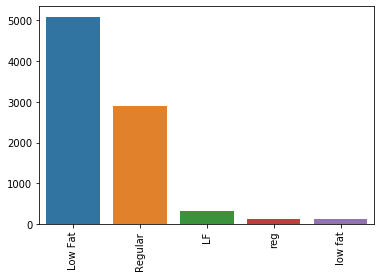

In [85]:
barplot(train['Item_Fat_Content'])

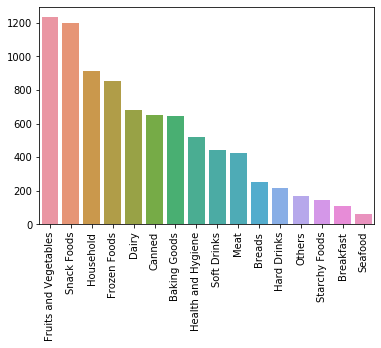

In [86]:
barplot(train['Item_Type'])

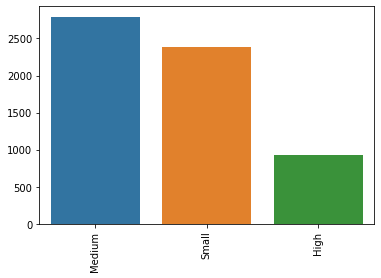

In [171]:
barplot(train['Outlet_Size'])

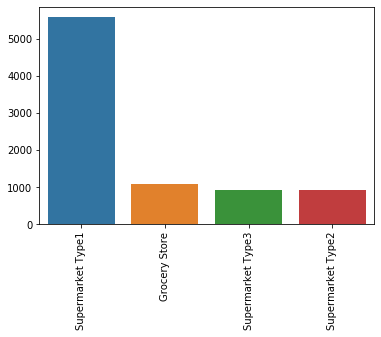

In [88]:
barplot(train['Outlet_Type'])

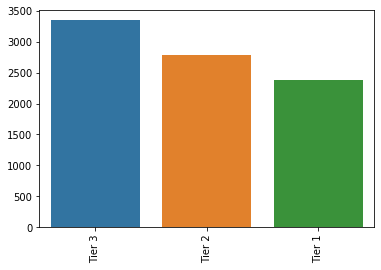

In [99]:
barplot(train['Outlet_Location_Type'])

inference made:
    
    1.'Item_Fat_Content',lf,reg,low fat has to be grouped into Low Fat and Regular.
    

### c.bivariate analysis

#### lets check the correlation between 'Item_Outlet_Sales' and continuous features

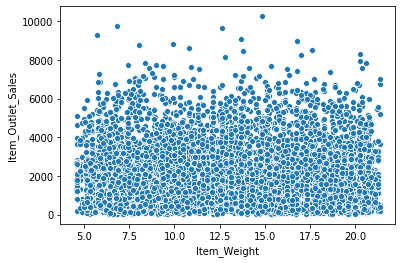

In [101]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=train)
plt.show()

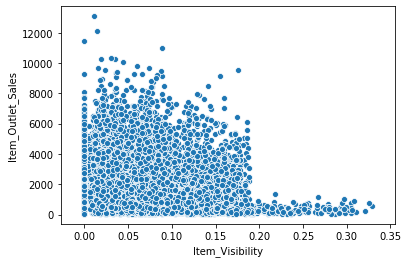

In [102]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

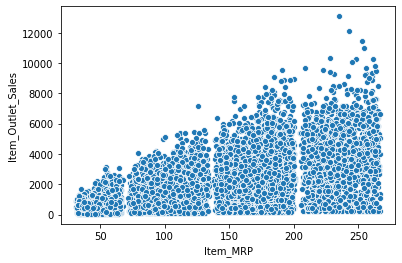

In [104]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.show()

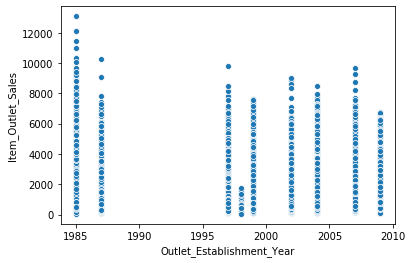

In [107]:
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)
plt.show()

inference made:
    
    1.'Item_Weight' and 'Item_Visibility'  has no correlation with 'Item_Outlet_Sales' 
       i.e increase in weight of a product or visiblity of a product does not increase sales.
       
    2.'Item_MRP' follows certain range with respect to sales.also it is postively correlated i.e as mrp ofa product                increases,the sale increases.
    
    3.'Outlet_Establishment_Year' vs 'Item_Outlet_Sales' implies that the store which was established in 1985 produces more        sales and all other stores has more or less the same slaes.

#### lets check the realtion between 'Item_Outlet_Sales' and categorical features

#### 1. "Outlet_Size"    VS   "Item_Outlet_Sales"

In [172]:
train['Outlet_Size'].value_counts(ascending=False)

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

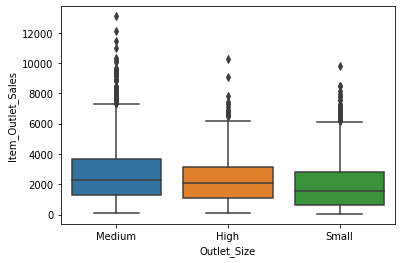

In [173]:
sns.boxplot(x= "Outlet_Size", y = "Item_Outlet_Sales" ,data= train)
plt.show()

#### Though large sized oulets is very less in numbers of sales,it gives relatively equal sales as medium sized outlets which is higher in numbers.

#### 2. "Outlet_Type"   VS   "Item_Outlet_Sales"

In [119]:
train['Outlet_Type'].value_counts(ascending=False)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

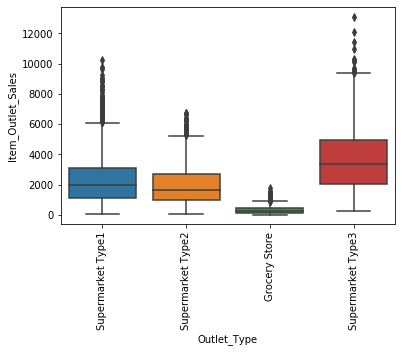

In [114]:
sns.boxplot(x= "Outlet_Type", y = "Item_Outlet_Sales" ,data= train)
plt.xticks(rotation=90)
plt.show()

##"Supermarket Type3" gives more "Item_Outlet_Sales" though it less in number of sales.whereas "grocery" gives ver less "Item_Outlet_Sales" even it is more in number of sales.

#### 3. "Item_Type"  VS "Item_Outlet_Sales"

In [120]:
train["Item_Type"].value_counts(ascending=False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

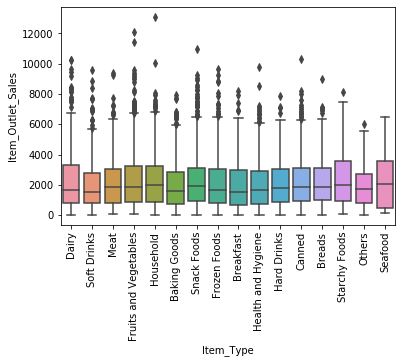

In [115]:
sns.boxplot(x= "Item_Type", y = "Item_Outlet_Sales" ,data= train)
plt.xticks(rotation=90)
plt.show()

#starchy foods and sea food gives high "Item_Outlet_Sales" even it is sold less in numbers of sales.

#### 4. "Outlet_Location_Type"  VS  "Item_Outlet_Sales"

In [129]:
train["Outlet_Location_Type"].value_counts(ascending=False)

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

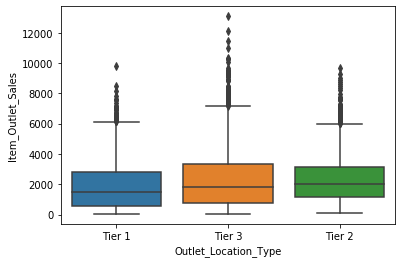

In [109]:
sns.boxplot(x= "Outlet_Location_Type", y = "Item_Outlet_Sales" ,data= train)
plt.show()

#tier-3 gives good "Item_Outlet_Sales" than tier-2,tier-1 which is high in number of sales.

#### After performing EDA, we are finally able to make some conclusions:

    1.'Item_Fat_Content',lf,reg,low fat has to be grouped into Low Fat and Regular.
    
    2.Visibility of any product cannot '0' which means the product is not present in the store but still got sold.so we can       deal this 0 visibility as null value and can replace with mean value.
    
    3.In  Item_Identifier, certain grouping can be seen.
      i.e in Item_Identifier,the first to letters FD, DR, NC, can be assume to be as Food, Drinks & Non-Consumable can  be       grouped accordingly.
    
    4.Consider combining categories in Outlet_Type.
    
    5.Determine the years of operation of a store instaed of 'Outlet_Establishment_Year'.

## 4. DATA CLEANING

#### TREATING THE NULL VALUES

In [183]:
#checking for null values

data.isnull().sum()

#here 5681 missing values from Item_Outlet_Sales columns are from test dataset which we are going to predict.
#we have to deal with 2439 missing values of Item_Weight which is a continuous fature and
#4061 missing values of Outlet_Size which is a categorical feature

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [184]:
from scipy.stats import mode

outlet_mode= data.pivot_table( index = "Outlet_Type" , values = "Outlet_Size",aggfunc= lambda x : mode(x).mode[0]  )

print("Missing Outlet_Size : " , data['Outlet_Size'].isnull().sum())
data.loc[data['Outlet_Size'].isnull(), "Outlet_Size"] = data.loc[data['Outlet_Size'].isnull(), "Outlet_Type"]. apply ( lambda x : outlet_mode.loc[x])
print("Missing Outlet_Size : ",data['Outlet_Size'].isnull().sum())

Missing Outlet_Size :  4016
Missing Outlet_Size :  0


In [186]:
data['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [187]:
#filling Item_Weight with mean value of particular item_identifier

item_mean_weight = data.pivot_table( index = "Item_Identifier" , values = "Item_Weight",aggfunc='mean')

print("Missing Item_Weight : " , data['Item_Weight'].isnull().sum()  )
data.loc[data['Item_Weight'].isnull(), "Item_Weight"] =   data.loc[data['Item_Weight'].isnull(), "Item_Identifier"]. apply ( lambda x : item_mean_weight.loc[x])
print("Missing Item_Weight : " , data['Item_Weight'].isnull().sum()  )


Missing Item_Weight :  2439
Missing Item_Weight :  0


In [188]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

## 5.DATA PREPARATION

In [189]:
#1.'Item_Visibility'

mean_visiblity=data.pivot_table(index='Item_Identifier',values='Item_Visibility',aggfunc='mean')


print('no of rows with 0 visibility=',(data['Item_Visibility']==0).sum())

data.loc[data['Item_Visibility']==0,'Item_Visibility'] = data.loc[data['Item_Visibility']==0,'Item_Identifier'].apply(lambda x: mean_visiblity.loc[x])

print('no of rows with 0 visibility=',(data['Item_Visibility']==0).sum())

no of rows with 0 visibility= 879
no of rows with 0 visibility= 0


In [190]:
#2 'Item_identifier'

data['Item category']=data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item category']=data['Item category'].map({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})
data['Item category'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item category, dtype: int64

In [191]:
#3.Item_Fat_Content

print(data['Item_Fat_Content'].unique())

data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','LF':'Low Fat','low fat':'Low Fat'})

print(data['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'Regular']


In [192]:
##Mark non-consumables as separate category in Item_Fat_Content:

data.loc[data["Item category"] == "Non-Consumable" , "Item_Fat_Content" ]='Non-Consumable'
print(data["Item_Fat_Content"].value_counts())

Low Fat           6499
Regular           5019
Non-Consumable    2686
Name: Item_Fat_Content, dtype: int64


In [193]:
#4.Outlet_Type

data.pivot_table(values= "Item_Outlet_Sales", index = "Outlet_Type",aggfunc='mean' )

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


from the above table,we can see that Supermarket Type3,Supermarket Type2 does not have equal average sales.so,considering them to group together is a bad idea.

In [194]:
#5."Outlet_Establishment_Year"

data['Age_of_the_store']=data['Outlet_Establishment_Year'].apply(lambda x:2013-x)
data["Age_of_the_store"]=data["Age_of_the_store"].astype("int8")
data['Age_of_the_store'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Age_of_the_store, dtype: float64

### ENCODING THE CATEGORICAL COLUMNS

#Outlet_Identifier column cannot be deleted since , we need them for submission.so we are creating a dummy column 'Outlet' and then encoding it using Labelencoder.

In [195]:
#coding all categorical variables as numeric using ‘LabelEncoder’ .


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder().fit(data["Outlet_Identifier"])
data["Outlet"]= le.transform(data["Outlet_Identifier"])
data["Outlet"] = data["Outlet"].astype("category")
data["Outlet"].unique()



#d=['Item_Fat_Content','Outlet','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item category']

#for i in d:
    #data[i] = le.fit_transform(data[i].astype('category'))

[9, 3, 0, 1, 5, 7, 2, 8, 6, 4]
Categories (10, int64): [9, 3, 0, 1, ..., 2, 8, 6, 4]

In [196]:
data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].astype("category")
data.dtypes

Item_Fat_Content               object
Item_Identifier                object
Item_MRP                      float64
Item_Outlet_Sales             float64
Item_Type                      object
Item_Visibility               float64
Item_Weight                   float64
Outlet_Establishment_Year    category
Outlet_Identifier              object
Outlet_Location_Type           object
Outlet_Size                    object
Outlet_Type                    object
source                         object
Item category                  object
Age_of_the_store                 int8
Outlet                       category
dtype: object

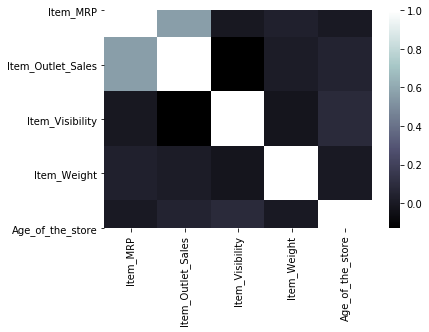

In [197]:
cor = data.corr()
sns.heatmap(cor,cmap="bone" )
plt.show()


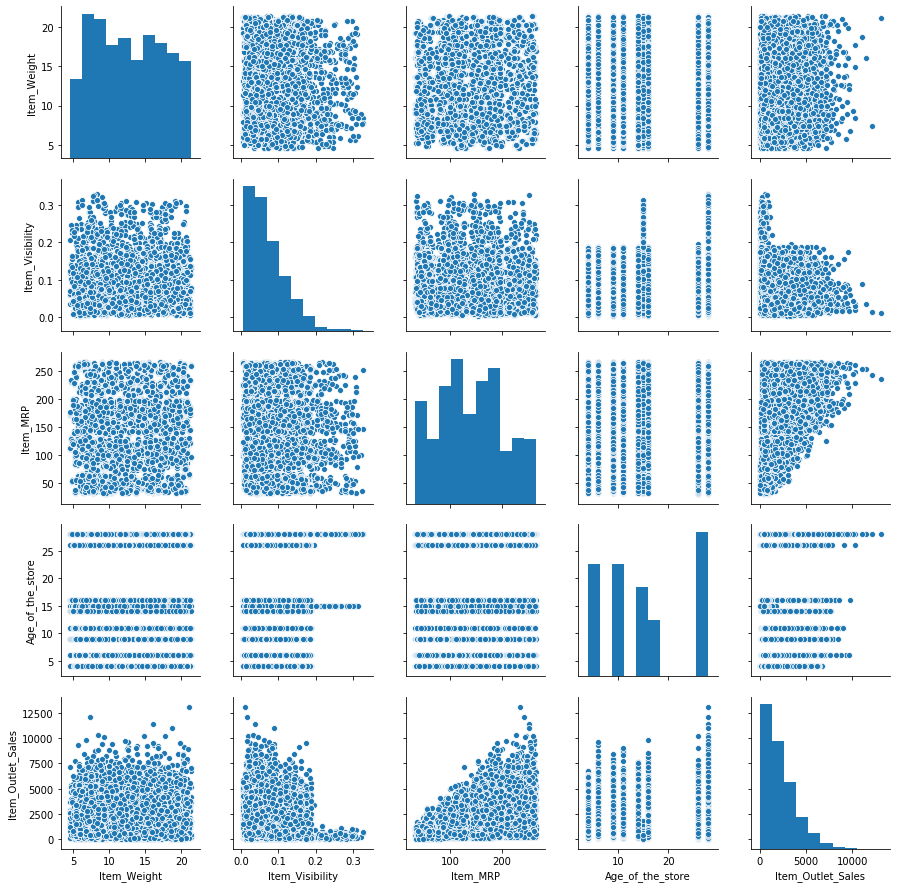

In [126]:
sns.pairplot(data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Age_of_the_store', 'Item_Outlet_Sales']] )
plt.show()

In [198]:
data.dtypes

Item_Fat_Content               object
Item_Identifier                object
Item_MRP                      float64
Item_Outlet_Sales             float64
Item_Type                      object
Item_Visibility               float64
Item_Weight                   float64
Outlet_Establishment_Year    category
Outlet_Identifier              object
Outlet_Location_Type           object
Outlet_Size                    object
Outlet_Type                    object
source                         object
Item category                  object
Age_of_the_store                 int8
Outlet                       category
dtype: object

In [199]:
#One Hot Coding:creating dummy varibles of those numeric columns.

data = pd.get_dummies(data=data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item category','Outlet'],drop_first = True)

In [204]:
data.dtypes

Item_Identifier                      object
Item_MRP                            float64
Item_Outlet_Sales                   float64
Item_Type                            object
Item_Visibility                     float64
Item_Weight                         float64
Outlet_Establishment_Year          category
Outlet_Identifier                    object
source                               object
Age_of_the_store                       int8
Item_Fat_Content_Non-Consumable       uint8
Item_Fat_Content_Regular              uint8
Outlet_Location_Type_Tier 2           uint8
Outlet_Location_Type_Tier 3           uint8
Outlet_Size_Medium                    uint8
Outlet_Size_Small                     uint8
Outlet_Type_Supermarket Type1         uint8
Outlet_Type_Supermarket Type2         uint8
Outlet_Type_Supermarket Type3         uint8
Item category_Food                    uint8
Item category_Non-Consumable          uint8
Outlet_1                              uint8
Outlet_2                        

In [205]:
data.head(2)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Age_of_the_store,...,Item category_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,4,...,0,0,0,1,0,0,0,0,0,0


## 6.MODEL BUILDING

In [206]:
#removing unnecessary columns.

data=data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1)

#splitting train,test

train = data.loc [data["source"] == "train"]
test = data.loc [data["source"] == "test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)


## model building

In [207]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

train = pd.read_csv('train_modified.csv')
test= pd.read_csv('test_modified.csv')

print('\nShape of training data :',train.shape)
print('\nShape of testing data :',test.shape)


Shape of training data : (8523, 27)

Shape of testing data : (5681, 26)


### 1.base model

In [208]:
base_model = test[["Item_Identifier", "Outlet_Identifier"]]
base_model["Item_Outlet_Sales"] =  train["Item_Outlet_Sales"].mean()
#base_model.to_csv("base_model.csv",index=False)

### 2.classification models 

In [209]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [210]:
def models(algorithm,X_val,y_val,X_train,y_train ,file_name,X_test):
    model = algorithm
    model.fit(X_train,y_train)
    
    ytrain_pred = model.predict(X_train)
    yval_pred = model.predict(X_val)
    rmse_train = np.sqrt(mean_squared_error(y_train, ytrain_pred) )
    rmse_val = np.sqrt(mean_squared_error(y_val, yval_pred) )
    
    scores_train = model.score(X_train,y_train)
    scores_val = model.score(X_val,y_val)
    
    accuracy = cross_val_score(estimator=model, X=X_train, y=y_train,cv=10)
#     print(f"The accuracy of the Polynomial Regression Model is \t {accuracy.mean()}")
#     print(f"The deviation in the accuracy is \t {accuracy.std()}")


    score.loc[file_name] = [ scores_train ,  scores_val,rmse_train, rmse_val,accuracy.mean(),accuracy.std()  ]
    
    #submission
    submission = test[["Item_Identifier", "Outlet_Identifier"]]
    submission["Item_Outlet_Sales"] =  model.predict(X_test)
    file_name = file_name + ".csv"
    submission.to_csv(file_name,index=False)

In [213]:
score = pd.DataFrame ( columns = ["Train_Score", "Validate_Score", "Train_RMSE","Validate_RMSE", "Accuuracy_Mean", "Accuracy_Std"])
y_train = train ["Item_Outlet_Sales"]

X= train.drop(["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"] , axis = 1)
y= train["Item_Outlet_Sales"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state = 0)

X_test= test.drop(["Item_Identifier","Outlet_Identifier"] , axis = 1)



#models

models (LinearRegression() , X_val,y_val, X_train,y_train ,"LinearRegression",X_test)

models (Lasso() , X_val,y_val, X_train,y_train ,"Lasso",X_test)

models (Ridge() , X_val,y_val, X_train,y_train ,"Ridge",X_test)

models(DecisionTreeRegressor(max_depth=12, min_samples_leaf=100) ,  X_val,y_val, X_train,y_train ,"DecisionTreeRegressor",X_test)

models(DecisionTreeRegressor(max_depth=8, min_samples_leaf=150) ,  X_val,y_val, X_train,y_train ,"DecisionTreeRegressor2",X_test)

alg_RFR = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4) 
models (alg_RFR , X_val,y_val, X_train,y_train ,"RandomForestRegressor",X_test)

alg_RFR2 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
models (alg_RFR2 , X_val,y_val, X_train,y_train ,"RandomForestRegressor2",X_test)

score

,Train_Score,Validate_Score,Train_RMSE,Validate_RMSE,Accuuracy_Mean,Accuracy_Std
LinearRegression,0.563172,0.564179,1127.075302,1129.418871,0.560235,0.019649
Lasso,0.563060,0.563785,1127.219849,1129.928743,0.560329,0.019544
Ridge,0.563172,0.564160,1127.075916,1129.443733,0.560245,0.019641
DecisionTreeRegressor,0.615995,0.590435,1056.735112,1094.869645,0.585711,0.015651
DecisionTreeRegressor2,0.604597,0.581781,1072.303165,1106.375656,0.584674,0.016590
RandomForestRegressor,0.605099,0.588419,1071.622767,1097.560437,0.593642,0.015322
RandomForestRegressor2,0.608531,0.590190,1066.955912,1095.197448,0.593770,0.015209


In [214]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
models (clf , X_val,y_val, X_train,y_train ,"GradientBoostingRegressor",X_test)


params = {'n_estimators': 750, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.00999, 'loss': 'ls', 'criterion':'mse', 'random_state' : 1}
clf = ensemble.GradientBoostingRegressor(**params )
models (clf , X_val,y_val, X_train,y_train ,"GradientBoostingRegressor2",X_test)
score

,Train_Score,Validate_Score,Train_RMSE,Validate_RMSE,Accuuracy_Mean,Accuracy_Std
LinearRegression,0.563172,0.564179,1127.075302,1129.418871,0.560235,0.019649
Lasso,0.563060,0.563785,1127.219849,1129.928743,0.560329,0.019544
Ridge,0.563172,0.564160,1127.075916,1129.443733,0.560245,0.019641
DecisionTreeRegressor,0.615995,0.590435,1056.735112,1094.869645,0.585711,0.015651
DecisionTreeRegressor2,0.604597,0.581781,1072.303165,1106.375656,0.584674,0.016590
RandomForestRegressor,0.605099,0.588419,1071.622767,1097.560437,0.593642,0.015322
RandomForestRegressor2,0.608531,0.590190,1066.955912,1095.197448,0.593770,0.015209
GradientBoostingRegressor,0.642622,0.594007,1019.440056,1090.084398,0.589200,0.021176
GradientBoostingRegressor2,0.656500,0.592211,999.449462,1092.492889,0.585165,0.020597


In [215]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
cv_model.fit(X_train, y_train)

e_net = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)

models (e_net , X_val,y_val, X_train,y_train ,"ElasticNet",X_test)
score

,Train_Score,Validate_Score,Train_RMSE,Validate_RMSE,Accuuracy_Mean,Accuracy_Std
LinearRegression,0.563172,0.564179,1127.075302,1129.418871,0.560235,0.019649
Lasso,0.563060,0.563785,1127.219849,1129.928743,0.560329,0.019544
Ridge,0.563172,0.564160,1127.075916,1129.443733,0.560245,0.019641
DecisionTreeRegressor,0.615995,0.590435,1056.735112,1094.869645,0.585711,0.015651
DecisionTreeRegressor2,0.604597,0.581781,1072.303165,1106.375656,0.584674,0.016590
RandomForestRegressor,0.605099,0.588419,1071.622767,1097.560437,0.593642,0.015322
RandomForestRegressor2,0.608531,0.590190,1066.955912,1095.197448,0.593770,0.015209
GradientBoostingRegressor,0.642622,0.594007,1019.440056,1090.084398,0.589200,0.021176
GradientBoostingRegressor2,0.656500,0.592211,999.449462,1092.492889,0.585165,0.020597
ElasticNet,0.563129,0.564020,1127.130468,1129.624399,0.560308,0.019490
